In [38]:
import R_hydrogen_import as rad
import spherical_harms as sph
import random as rnd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import scipy.special as spe
from scipy.interpolate import interp1d
import numpy as np
pio.renderers.default='iframe'

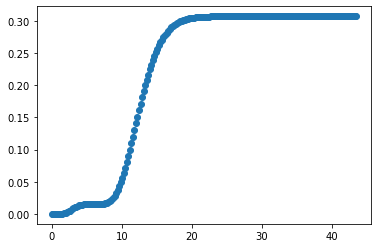

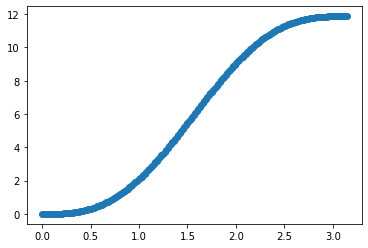

In [41]:
#convierte esfericas a cartesianas
def convert(r,theta,phi):
    x=r*np.sin(theta)*np.cos(phi)
    y=r*np.sin(theta)*np.sin(phi)
    z=r*np.cos(theta)
    return x,y,z

#sirve para encontrar el valor más cercano a uno dado en un array
def find_nearest(array, value): 
    array = np.asarray(array) 
    idx = (np.abs(array - value)).argmin() 
    return int(idx)

#funcion de calculo de la probabilidad radial
def rad_prob(n,l,Z,mu):
    
    def calculate(rm):
        Dr = rm / (npt-1)
        r = np.linspace(0., rm, npt)
        R = rad.radial(r, n, l, Z, mu)
        P2 = (r * R)**2
        integ =  P2.sum() * Dr
        return integ, r, R, P2
    
    rm = 3. * n**2 / Z / mu
    loop = True
    while loop:
        integ, r, R, P2 = calculate(rm)
        if integ<0.999999:
            rm *= 1.1
        elif integ>0.9999999:
            rm *= 0.9
        else:
            loop = False
            
    return P2,rm

#parámetros de cálculo, serán inputs de la clase orbital cuando se cree
npt=200
n=3
l=1
m=1
Z=1
mu=1
discret=1

#cálculo de r, P^2 y ftheta^2
R,r_max=rad_prob(n,l,Z,mu)
theta=np.linspace(0,np.pi,npt)

theta_lm=sph.ftheta(l,m,theta)
ang_prob=np.abs(theta_lm)**2

prob_R=[]
prob_ang=[]

aux_R=0
aux_ang=0

#calculo de la integral acumulada para r y para la parte angular
for i in range(0,npt,discret):
    for j in range(discret):
        aux_R+=R[i+j]**2
        aux_ang+=ang_prob[i+j]
    aux_R/=discret
    aux_ang/=discret
    prob_R.append(aux_R)
    prob_ang.append(aux_ang)

x1=np.linspace(0,r_max,len(prob_R))
x2=np.linspace(0,np.pi,len(prob_ang))
plt.scatter(x1,prob_R)
plt.show()

plt.scatter(x2,prob_ang)
plt.show()

In [40]:
#interpolación de los datos calculados anteriormente. sirve para suavizar los valores
f_rad_aux=interp1d(x1, prob_R, kind='cubic')
f_ang_aux=interp1d(x2,prob_ang, kind='cubic')
f_rad=f_rad_aux(x1)
f_ang=f_ang_aux(x2)

N=1000   #numero de puntos de la gráfica. a partir de 3000 ejecuciones pesadas

fig=go.Figure()
fig.update(layout_showlegend=False)

for i in range(N):
    
    #generación de valores aleatorios de probabilidad para r y theta
    r_rand=rnd.uniform(0,np.max(prob_R))
    theta_rand=rnd.uniform(0,np.max(prob_ang))
    
    #buscamos en el array el indice del valor mas cercano de probabilidad
    r_idx=find_nearest(f_rad,r_rand)
    theta_idx=find_nearest(f_ang,theta_rand)
    
    #con el indice, buscamos la coordenada r, theta correspondiente. phi es aleatorio
    r_fin=x1[r_idx]
    theta_fin=x2[theta_idx]
    phi_fin=rnd.uniform(0,2*np.pi)
    
    x,y,z=convert(r_fin,theta_fin,phi_fin)
    xs=np.array(x)
    ys=np.array(y)
    zs=np.array(z)
    fig.add_trace(go.Scatter3d(
            x=xs,
            y=ys,
            z=zs,
            mode='markers',
            marker=dict(
            size=1,
            color = 'red'
 )))
fig.show()

In [ ]:
f_ang()